You will need to design and train an MLP so that the model could classify different digit.

In [1]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms

transform = transforms.ToTensor()

train_data = datasets.MNIST(
    root='data', 
    train=True, 
    download=True, 
    transform=transform)
test_data = datasets.MNIST(
    root='data', 
    train=False,
    download=True, 
    transform=transform)

batch_size = 64

train_loader = torch.utils.data.DataLoader(
    train_data, 
    batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(
    test_data, 
    batch_size=batch_size)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!



/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


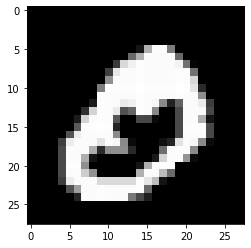

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
    
# Get one batch of data, batch size=64
images_train, labels_train = iter(train_loader).next()

plt.imshow(np.squeeze(images_train[63].numpy()), cmap='gray')
# python generator (.next()?)!!

In [ ]:
# X_flatten = X.reshape(X.shape[0], -1).T
images_flatten = images.reshape(images.shape[0],-1)
images_flatten.shape

In [ ]:
labels[0]

In [4]:
# How to use DataLoader?
# You can easily iterate through the train_loader/test_loader
# for epoch in range(20):
#   for x, y in train_loader: x is a batch of data, y is a batch of label

class ClassificationNet(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(ClassificationNet, self).__init__()
        # hidden layer
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        # output layer  
        self.out = torch.nn.Linear(n_hidden, n_output)

        # softmax function
        # self.softmax = torch.nn.Softmax()

    def forward(self, x):
        x = self.hidden(x)
        x = self.out(x)
        # x = self.softmax(x)
        return x

# initialize the network with specific size of input nodes, hidden nodes and output nodes
classification_net = ClassificationNet(n_feature=784, n_hidden=64, n_output=10)

# define the loss function we would like to use
loss_func = torch.nn.CrossEntropyLoss()

# choose the optimizer we want to use
optimizer = torch.optim.SGD(params=classification_net.parameters(), lr=0.01, momentum=0.9)

# print net architecture
print(classification_net) 

for epoch in range(20):
  for x_train, y_train in train_loader:
    x_train = x_train.reshape(x_train.shape[0],-1)
    y_pred = classification_net(x_train)  
    loss_train = loss_func(y_pred, y_train)  

    optimizer.zero_grad() 
    loss_train.backward()    
    optimizer.step()

  # for x_test, y_test in test_loader:
  #   x_test = x_test.reshape(x_test.shape[0],-1)
  #   y_pred = classification_net(x_test)  
  #   loss_test = loss_func(y_pred, y_test)  

  #   optimizer.zero_grad() 
  #   loss_test.backward()    
  #   optimizer.step()

  # if epoch % 2 == 0:
  #   print("Epoch {}, Train accuracy: {} ".format(epoch,loss_train))
  #   print("Epoch {}, Test accuracy: {} ".format(epoch,loss_test))


ClassificationNet(
  (hidden): Linear(in_features=784, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)


Predicted Digit = 2


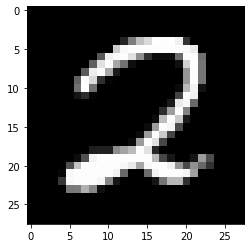

In [5]:
images_test, labels_test = iter(test_loader).next()
plt.imshow(np.squeeze(images_test[35].numpy()), cmap='gray')

img = images_test[35].view(1, 784)
with torch.no_grad():
    ps = classification_net(img)

probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))

In [ ]:
correct_count, all_count = 0, 0
for images,labels in test_loader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        ps = classification_net(img)

    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9178


In [ ]:
# cnt = 1
# for images, labels in test_loader:
#   if cnt == 2:
#     break
#   print(images.shape)
#   print(labels.shape)
#   cnt += 1

torch.Size([64, 1, 28, 28])
torch.Size([64])
